### Viewing and Structuring the Data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime

In [2]:
# # #img_md = pd.read_csv('../../../Data//ecotaxa_export_3203_20200731_1928.tsv', sep='\t')
# img_md = pd.read_csv('../../../Data/ecotaxa_export_3203_20200909_1843.tsv', sep='\t')
# img_md_subset = img_md[['object_id','object_annotation_status', 'object_annotation_category', 'object_annotation_hierarchy', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_pmt_fluorescence', 'object_peak_fluorescence']]
# img_md_subset.to_csv('../../../Data/ifcb_ecotaxa_subset_update.csv')
# del img_md # note this doesn't actually free to back to the system but just to python

In [3]:
img_md_subset = pd.read_csv('../../../Data/ifcb_ecotaxa_subset_update.csv')
img_md_subset = img_md_subset.drop('Unnamed: 0', 1)

In [4]:
img_md_subset.head()

object_id object_annotation_status  \
0  D20180221T193119_IFCB116_01153                validated   
1  D20180221T202431_IFCB116_00153                validated   
2  D20180221T202431_IFCB116_01303                validated   
3  D20180221T202431_IFCB116_03008                validated   
4  D20180221T212254_IFCB116_07034                validated   

  object_annotation_category  \
0                Pyramimonas   
1                Gymnodinium   
2                Gymnodinium   
3                 Katodinium   
4                Pyramimonas   

                         object_annotation_hierarchy sample_flag  object_lat  \
0  living>Eukaryota>Archaeplastida>Viridiplantae>...        good    -64.7535   
1  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
2  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
3  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
4  living>Eukaryota>Archaeplastida>Viridiplantae>...        good    -64.7802   

   object_lon  object_date  object_time  object_pmt_fluorescence  \
0    -64.1339     20180221       193119                  0.26577   
1    -64.1655     20180221       202431                  0.00269   
2    -64.1655     20180221       202431                  0.17801   
3    -64.1655     20180221       202431                  0.00254   
4    -63.9785     20180221       212254                  0.02183   

   object_peak_fluorescence  
0                   1.71370  
1                   0.01279  
2                   1.47800  
3                   0.01276  
4                   0.35693

In [5]:
# drop unwanted classes
img_md_subset = img_md_subset.drop(img_md_subset[img_md_subset.object_annotation_category == 'Unknowns'].index)

Merge classes to the final groupings

In [6]:
with pd.option_context('display.max_rows', 200):
    print(img_md_subset.groupby('object_annotation_category')['object_id'].nunique())

object_annotation_category
Amphiprora                     5339
Asteromphalus                     7
Bacillariophyceae             28443
Banquisia belgicae               46
Ceratium                        224
Chaetoceros single             4805
Chaetoceros<Mediophyceae       1438
Ciliophora                     7245
Cocconeis                        16
Corethron                       919
Crustacea                        11
Cryptophyta                   70779
Cylindrotheca                  3572
Dactyliosolen                   708
Dictyochales                  12322
Dinophyceae                   12792
Dinophysis                       48
Diplopsalis<Dinophyceae X        22
Eucampia                        279
Eucampia chain                   74
Guinardia                       518
Gymnodinium                   14367
Gyrodinium                      174
Katodinium                      838
Licmophora                      104
Membraneis                      322
Membraneis chain                  8
N

In [7]:
all_classes = list(img_md_subset.groupby('object_annotation_category')['object_id'].nunique().index)

#### All validated counts with images per class

In [8]:
# Individual pennate diatoms =      # all quite different keep apart
# Amphiprora                    502
# Cylindrotheca                 377
# Nitzschia frigida             833
# Pseudo-Nitzschia chain        995

# Groups = 
# general pennate diatoms                 # look through but could be merged in unidentified single pennates
# [
#     Banquisia belgicae             43   # similar to membraneis
#     Cocconeis                      13
#     Licmophora                     78
#     Pleurosigma                     1
# ]

# unidenfitied single pennates            # maybe similar enough
# [
#     Membraneis                    260
#     Navicula                      350
#     temp cylindrotheca            439
#     pennate 10 temp               592
#     pennate 11 temp              1266
#     pennate 2 temp                556
#     pennate 7 temp                680
#     pennate<Bacillariophyta       261

# ]

# unidenfitied chain pennates
# [
#     chain<pennate                 959
#     Membraneis chain                8  # this could go with membraneis singles if it helps
# ]

# individual centric diatoms

# Chaetoceros single            159 # put together? maybe
# Chaetoceros<Mediophyceae      729
# Corethron                     309
# Eucampia                      102 # put together? maybe
# Eucampia chain                 62
# Guinardia                     360
# Dactyliosolen                 148
# Proboscia sp.                 345 # could be merged with rhizosolenia

# general centric diatoms
# [
#     Asteromphalus                   5 # could go to unidentified single centrics
#     Odontella sp.                  37
#     Rhizosolenia                   82
# ]

# unidentified single centrics              # all of these could be merged together
# [
#     centric                      4670
#     centric 1 temp                657
#     centric 10 temp                 5
#     centric 2 temp                847
#     centric 3 temp                368
#     centric 4 temp                 46
#     centric 6 temp                262
# ]

# unidentified chain centrics =              # could be merged together but tbd
# [
#     chain<centric                  31
#     Thalassiosira                 488
# ]

# unidentified diatoms =
# Bacillariophyceae             429 # TODO leave for now could OR take it out lots of pennates and centrics


# cryptophytes = 
# Cryptophyta                  1045

# dinoflagellates = 
# Dinophyceae                   145  # kind of a catch-all might not predict well could go in general dinoflagellates
# Gymnodinium                   464
# Katodinium                    477
# Ceratium                      214
# Torodinium                    110
# dinoflagellate-i              178
# dinoflagellate-ii             682
# dinoflagellate-iii            157

# general dinoflagellates = 
# [
#     Gyrodinium                     85 
#     Dinophysis                     29
#     Diplopsalis<Dinophyceae X      12 # if needed throw into dinophyceae as a catchall
#     Warnowia                       31

# ]

# chlorophytes = 
# Pyramimonas                  1408

# haptophytes = 
# Phaeocystis                  1091

# silicoflagellates = 
# Dictyochales                  737

# microzooplankton = 
# Ciliophora                    546
# Tintinnida                     43



# unidentified flagellates = 
# [

# t005                          207
# t007                          285
# t009                           70
# t010                          200 # potentially 10 and 12 are similar
# t011                          500
# t012                          404
# t013                          279

# t020                            4

# ]
# small unidentified cells = 
# [
#     t002                         1208 # potentially together but a little different
#     t003                          807
# ]



# unidentified living cells = 
# [
#     Crustacea                       7 # could be tossed if needed
#     t004                           12 # could go with t019 if needed
#     t006                           48
#     t008                          143
#     t016                           75
#     t017                           26
#     t019                          708
#     Unknowns                      152 # could be tossed if needed

# ]

# other = [
#     badfocus<artefact            2011
#     bead                          535
#     bubble                        168
#     detritus                     1430
#     multiple<other                504
#     part<other                    218

# ]





### Merging Classes

#### Most individual classes as possible

In [9]:
# individual_pennate_diatoms
amphiprora = ['Amphiprora']                    
cylindrotheca = ['Cylindrotheca']                 
nitzschia_frigida = ['Nitzschia frigida']             
pseudo_nitzschia_chain = ['Pseudo-Nitzschia chain']        

general_pennate_diatoms = [
    'Banquisia belgicae',            
    'Cocconeis',                      
    'Licmophora',                     
    'Pleurosigma',                     
]

unidentified_single_pennates = [
    'Membraneis',                    
    'Navicula',                      
    'temp cylindrotheca',            
    'pennate 10 temp',               
    'pennate 11 temp',              
    'pennate 2 temp',                
    'pennate 7 temp',
    'pennate<Bacillariophyta',
]

unidenfitied_chain_pennates = [
    'chain<pennate',                 
    'Membraneis chain'                
]

# individual centric diatoms

chaetoceros = ['Chaetoceros single']             # put together - TODO yes put together
chaetoceros_mediophyceae = ['Chaetoceros<Mediophyceae']      
corethron = ['Corethron']                     
eucampia = ['Eucampia']                       # put together - TODO yes put together
eucampia_chain = ['Eucampia chain']                 
guinardia = ['Guinardia']                     
dactyliosolen = ['Dactyliosolen']                 
proboscia = ['Proboscia sp.']                 

general_centric_diatoms = [
    'Asteromphalus', # this could go with the centric cells                   
    'Odontella sp.',                  
    'Rhizosolenia',                   
]

unidentified_single_centrics = [
    'centric' ,                     
    'centric 1 temp'  ,              
    'centric 10 temp' ,                
    'centric 2 temp'  ,              
    'centric 3 temp'  ,              
    'centric 4 temp'   ,              
    'centric 6 temp'  ,              
]

unidentified_chain_centrics = [
    'chain<centric',                  
    'Thalassiosira',                
]

unidentified_diatoms = ['Bacillariophyceae']             


cryptophytes = ['Cryptophyta']                  

# individual dinoflagellates 
dinophyceae = ['Dinophyceae']                   
gymnodinium = ['Gymnodinium']                   
katodinium = ['Katodinium']                    
ceratium = ['Ceratium']                      
torodinium = ['Torodinium']                    
dinoflagellate_i = ['dinoflagellate-i']              
dinoflagellate_ii = ['dinoflagellate-ii']             
dinoflagellate_iii = ['dinoflagellate-iii']             

general_dinoflagellates = [
    'Gyrodinium',                     
    'Dinophysis'  ,                   
    'Diplopsalis<Dinophyceae X' ,     
    'Warnowia',                       
]

chlorophytes = ['Pyramimonas']                  

haptophytes = ['Phaeocystis']                  

silicoflagellates = ['Dictyochales']                  

# microzooplankton
ciliophora = ['Ciliophora']                    
tintinnida = ['Tintinnida']                     



unidentified_flagellates = [
    't005',                          
    't007',                         
    't009',                         
    't010',                       
    't011',                      
    't012',                     
    't013',                    
    't020',                     
]

small_unidentified_cells = [
    't002',                         
    't003',                          
]

unidentified_living_cells = [
    'Crustacea',                       
    't004'    ,                       
    't006'    ,                       
    't008'    ,                      
    't016'    ,                       
    't017'    ,                       
    't019'    ,                      
    'Unknowns',                      

]

other = [
    'badfocus<artefact',            
    'bead'             ,             
    'bubble'           ,             
    'detritus'         ,            
    'multiple<other'   ,             
    'part<other'       ,             

]

Medium complexity

In [10]:
# # individual_pennate_diatoms
# amphiprora = ['Amphiprora']                    
# cylindrotheca = ['Cylindrotheca']                 
# nitzschia_frigida = ['Nitzschia frigida']             
# pseudo_nitzschia_chain = ['Pseudo-Nitzschia chain']        

# general_pennate_diatoms = [
#     'Banquisia belgicae',            
#     'Cocconeis',                      
#     'Licmophora',                     
#     'Pleurosigma',                     
# ]

# unidentified_single_pennates = [
#     'Membraneis',                    
#     'Navicula',                      
#     'temp cylindrotheca',            
#     'pennate 10 temp',               
#     'pennate 11 temp',              
#     'pennate 2 temp',                
#     'pennate 7 temp',
#     'pennate<Bacillariophyta',
# ]

# unidenfitied_chain_pennates = [
#     'chain<pennate',                 
#     'Membraneis chain'                
# ]

# # individual centric diatoms

# chaetoceros = ['Chaetoceros single']             # put together - TODO yes put together
# chaetoceros_mediophyceae = ['Chaetoceros<Mediophyceae']      
# corethron = ['Corethron']                     
# eucampia = ['Eucampia']                       # put together - TODO yes put together
# eucampia_chain = ['Eucampia chain']                 
# guinardia = ['Guinardia']                     
# dactyliosolen = ['Dactyliosolen']                 
# proboscia = ['Proboscia sp.']                 

# general_centric_diatoms = [
#     'Asteromphalus', # this could go with the centric cells                   
#     'Odontella sp.',                  
#     'Rhizosolenia',                   
# ]

# unidentified_single_centrics = [
#     'centric' ,                     
#     'centric 1 temp'  ,              
#     'centric 10 temp' ,                
#     'centric 2 temp'  ,              
#     'centric 3 temp'  ,              
#     'centric 4 temp'   ,              
#     'centric 6 temp'  ,              
# ]

# unidentified_chain_centrics = [
#     'chain<centric',                  
#     'Thalassiosira',                
# ]

# unidentified_diatoms = ['Bacillariophyceae']             


# cryptophytes = ['Cryptophyta']                  

# # individual dinoflagellates 
# dinophyceae = ['Dinophyceae']                   
# gymnodinium = ['Gymnodinium']                   
# katodinium = ['Katodinium']                    
# ceratium = ['Ceratium']                      
# torodinium = ['Torodinium']                    
# dinoflagellate_i = ['dinoflagellate-i']              
# dinoflagellate_ii = ['dinoflagellate-ii']             
# dinoflagellate_iii = ['dinoflagellate-iii']             

# general_dinoflagellates = [
#     'Gyrodinium',                     
#     'Dinophysis'  ,                   
#     'Diplopsalis<Dinophyceae X' ,     
#     'Warnowia',                       
# ]

# chlorophytes = ['Pyramimonas']                  

# haptophytes = ['Phaeocystis']                  

# silicoflagellates = ['Dictyochales']                  

# # microzooplankton
# ciliophora = ['Ciliophora']                    
# tintinnida = ['Tintinnida']                     



# unidentified_flagellates = [
#     't005',                          
#     't007',                         
#     't009',                         
#     't010',                       
#     't011',                      
#     't012',                     
#     't013',                    
#     't020',                     
# ]

# small_unidentified_cells = [
#     't002',                         
#     't003',                          
# ]

# unidentified_living_cells = [
#     'Crustacea',                       
#     't004'    ,                       
#     't006'    ,                       
#     't008'    ,                      
#     't016'    ,                       
#     't017'    ,                       
#     't019'    ,                      
#     'Unknowns',                      

# ]

# other = [
#     'badfocus<artefact',            
#     'bead'             ,             
#     'bubble'           ,             
#     'detritus'         ,            
#     'multiple<other'   ,             
#     'part<other'       ,             

# ]

In [11]:
all_classes_sep = amphiprora+cylindrotheca+nitzschia_frigida+pseudo_nitzschia_chain+general_pennate_diatoms+unidentified_single_pennates+unidenfitied_chain_pennates+chaetoceros+chaetoceros_mediophyceae+corethron+eucampia+eucampia_chain+guinardia+dactyliosolen+proboscia+general_centric_diatoms+unidentified_single_centrics+unidentified_chain_centrics+unidentified_diatoms+cryptophytes+dinophyceae+gymnodinium+katodinium+ceratium+torodinium+dinoflagellate_i+dinoflagellate_ii+dinoflagellate_iii+general_dinoflagellates+chlorophytes+haptophytes+silicoflagellates+ciliophora+tintinnida+unidentified_flagellates+small_unidentified_cells+unidentified_living_cells+other
len(all_classes), len(all_classes_sep)

(80, 81)

#### Simpler Classes

In [12]:
# pennate_diatoms = [
#     'Amphiprora',
#     'Banquisia belgicae',
#     'Cocconeis',
#     'Cylindrotheca',
#     'Licmophora',
#     'Nitzschia frigida',
#     'Pleurosigma',
#     'Pseudo-Nitzschia chain',
#     'Membraneis',
#     'Navicula',
#     'temp cylindrotheca',
#     'pennate 10 temp',
#     'pennate 11 temp',
#     'pennate 2 temp',
#     'pennate 7 temp', # also mentioned general pennate group but no corresponding one?
#     'chain<pennate',
#     'Membraneis chain',
#     'pennate<Bacillariophyta', # where does this go?
# ]

# centric_diatoms = [
#     'Asteromphalus',
#     'Chaetoceros<Mediophyceae', # correct?
#     'Chaetoceros single',
#     'Corethron',
#     'Eucampia',
#     'Eucampia chain',
#     'Guinardia',
#     'Dactyliosolen',
#     'Odontella sp.', # correct?
#     'Proboscia sp.', # correct?
#     'Rhizosolenia',
#     'centric 1 temp',
#     'centric 10 temp',
#     'centric 2 temp',
#     'centric 3 temp',
#     'centric 4 temp',
#     'centric 6 temp', 
#     'centric',      # general centric group?
#     'Thalassiosira',
#     'chain<centric'
# ]

# unidentified_diatoms = [
#     'Bacillariophyceae',
# ]

# cryptophytes = [
#     'Cryptophyta',
# ]

# dinoflagellates = [
#     'Dinophyceae',
#     'Diplopsalis<Dinophyceae X', # does this belong here?
#     'Gymnodinium',
#     'Gyrodinium',
#     'Katodinium',
#     'Ceratium',
#     'Dinophysis',
#     'Diplopsalis',
#     'Warnowia',
#     'Torodinium',
#     'dinoflagellate-i',
#     'dinoflagellate-ii',
#     'dinoflagellate-iii'
# ]

# prasinophytes_chlorophytes = [
#     'Pyramimonas'
# ]

# haptophytes_prymnesiophyte = [
#     'Phaeocystis'
# ]

# silicoflagellates = [
#     'Dictyochales'
# ]

# microzooplankton = [
#     'Ciliophora',
#     'Tintinnida',
#     'Crustacea'
# ]

# unidentified_flagellates = [
#     't005',
#     't007',
#     't009',
#     't010',
#     't011',
#     't012',
#     't013',
#     't020'
# ]

# unidentified_small_cells = [
#     't002',
#     't003'
# ]

# other_unidentified_living_cells = [
#     'Unknowns',
#     't004',
#     't006',
#     't008',
#     't016',
#     't017',
#     't019',
# ]

# other = [
#     'bead',
#     'bubble',
#     'detritus',
#     'badfocus<artefact',
#     'multiple<other',
#     'part<other'
# ]



In [13]:
# all_classes_sep = pennate_diatoms + centric_diatoms + unidentified_diatoms + cryptophytes + \
# dinoflagellates  + prasinophytes_chlorophytes + haptophytes_prymnesiophyte + \
# silicoflagellates + microzooplankton + unidentified_flagellates + unidentified_small_cells +\
# other_unidentified_living_cells + other
# len(all_classes), len(all_classes_sep)

In [14]:
import numpy as np
np.unique(all_classes_sep, return_counts=True)

(array(['Amphiprora', 'Asteromphalus', 'Bacillariophyceae',
        'Banquisia belgicae', 'Ceratium', 'Chaetoceros single',
        'Chaetoceros<Mediophyceae', 'Ciliophora', 'Cocconeis', 'Corethron',
        'Crustacea', 'Cryptophyta', 'Cylindrotheca', 'Dactyliosolen',
        'Dictyochales', 'Dinophyceae', 'Dinophysis',
        'Diplopsalis<Dinophyceae X', 'Eucampia', 'Eucampia chain',
        'Guinardia', 'Gymnodinium', 'Gyrodinium', 'Katodinium',
        'Licmophora', 'Membraneis', 'Membraneis chain', 'Navicula',
        'Nitzschia frigida', 'Odontella sp.', 'Phaeocystis', 'Pleurosigma',
        'Proboscia sp.', 'Pseudo-Nitzschia chain', 'Pyramimonas',
        'Rhizosolenia', 'Thalassiosira', 'Tintinnida', 'Torodinium',
        'Unknowns', 'Warnowia', 'badfocus<artefact', 'bead', 'bubble',
        'centric', 'centric 1 temp', 'centric 10 temp', 'centric 2 temp',
        'centric 3 temp', 'centric 4 temp', 'centric 6 temp',
        'chain<centric', 'chain<pennate', 'detritus', 'dinof

In [15]:
list(set(all_classes) - set(all_classes_sep))

[]

In [16]:
# # go through all classes and say that if they're in other classes merge them into the final ones

# classes = [pennate_diatoms, centric_diatoms, unidentified_diatoms, cryptophytes,
# dinoflagellates, prasinophytes_chlorophytes, haptophytes_prymnesiophyte,
# silicoflagellates, microzooplankton, unidentified_flagellates, unidentified_small_cells,
# other_unidentified_living_cells, other]

# class_names = ['pennate_diatoms', 'centric_diatoms', 'unidentified_diatoms', 'cryptophytes',
# 'dinoflagellates', 'prasinophytes_chlorophytes', 'haptophytes_prymnesiophyte',
# 'silicoflagellates', 'microzooplankton', 'unidentified_flagellates', 'unidentified_small_cells',
# 'other_unidentified_living_cells', 'other']

# img_md_subset["merged_category"] = ""
# for i in range(len(classes)):
#     img_md_subset['merged_category'][img_md_subset['object_annotation_category'].isin(classes[i])] = class_names[i]





In [17]:
### Doing the same but for the more complex classes:

classes = [amphiprora,cylindrotheca,nitzschia_frigida,pseudo_nitzschia_chain,general_pennate_diatoms,
unidentified_single_pennates,unidenfitied_chain_pennates,chaetoceros,chaetoceros_mediophyceae,corethron,
eucampia,eucampia_chain,guinardia,dactyliosolen,proboscia,general_centric_diatoms,unidentified_single_centrics,
unidentified_chain_centrics,unidentified_diatoms,cryptophytes,dinophyceae,gymnodinium,katodinium,ceratium,
torodinium,dinoflagellate_i,dinoflagellate_ii,dinoflagellate_iii,general_dinoflagellates,chlorophytes,haptophytes,
silicoflagellates,ciliophora,tintinnida,unidentified_flagellates,small_unidentified_cells,
           unidentified_living_cells,other]

class_names = ['amphiprora','cylindrotheca','nitzschia_frigida','pseudo_nitzschia_chain','general_pennate_diatoms',
'unidentified_single_pennates','unidenfitied_chain_pennates','chaetoceros','chaetoceros_mediophyceae','corethron',
'eucampia','eucampia_chain','guinardia','dactyliosolen','proboscia','general_centric_diatoms','unidentified_single_centrics',
'unidentified_chain_centrics','unidentified_diatoms','cryptophytes','dinophyceae','gymnodinium','katodinium','ceratium',
'torodinium','dinoflagellate_i','dinoflagellate_ii','dinoflagellate_iii','general_dinoflagellates','chlorophytes',
'haptophytes','silicoflagellates','ciliophora','tintinnida','unidentified_flagellates','small_unidentified_cells',
           'unidentified_living_cells','other']

img_md_subset["merged_category"] = ""
for i in range(len(classes)):
    img_md_subset['merged_category'][img_md_subset['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
# img_md_subset.to_csv('ifcb_ecotaxa_subset_merged.csv')

In [19]:
img_md_subset.groupby('merged_category')['object_id'].nunique()

merged_category
amphiprora                        5339
ceratium                           224
chaetoceros                       4805
chaetoceros_mediophyceae          1438
chlorophytes                    113296
ciliophora                        7245
corethron                          919
cryptophytes                     70779
cylindrotheca                     3572
dactyliosolen                      708
dinoflagellate_i                 13245
dinoflagellate_ii                13006
dinoflagellate_iii                1004
dinophyceae                      12792
eucampia                           279
eucampia_chain                      74
general_centric_diatoms            151
general_dinoflagellates            293
general_pennate_diatoms            167
guinardia                          518
gymnodinium                      14367
haptophytes                       2792
katodinium                         838
nitzschia_frigida                20343
other                           274678
proboscia

In [20]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(img_md_subset['object_lon'], img_md_subset['object_lat'])]
gdf = GeoDataFrame(img_md_subset, geometry=geometry)   
gdf.head()

object_id object_annotation_status  \
0  D20180221T193119_IFCB116_01153                validated   
1  D20180221T202431_IFCB116_00153                validated   
2  D20180221T202431_IFCB116_01303                validated   
3  D20180221T202431_IFCB116_03008                validated   
4  D20180221T212254_IFCB116_07034                validated   

  object_annotation_category  \
0                Pyramimonas   
1                Gymnodinium   
2                Gymnodinium   
3                 Katodinium   
4                Pyramimonas   

                         object_annotation_hierarchy sample_flag  object_lat  \
0  living>Eukaryota>Archaeplastida>Viridiplantae>...        good    -64.7535   
1  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
2  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
3  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
4  living>Eukaryota>Archaeplastida>Viridiplantae>...        good    -64.7802   

   object_lon  object_date  object_time  object_pmt_fluorescence  \
0    -64.1339     20180221       193119                  0.26577   
1    -64.1655     20180221       202431                  0.00269   
2    -64.1655     20180221       202431                  0.17801   
3    -64.1655     20180221       202431                  0.00254   
4    -63.9785     20180221       212254                  0.02183   

   object_peak_fluorescence merged_category  \
0                   1.71370    chlorophytes   
1                   0.01279     gymnodinium   
2                   1.47800     gymnodinium   
3                   0.01276      katodinium   
4                   0.35693    chlorophytes   

                              geometry  
0            POINT (-64.1339 -64.7535)  
1  POINT (-64.16549999999999 -64.7741)  
2  POINT (-64.16549999999999 -64.7741)  
3  POINT (-64.16549999999999 -64.7741)  
4  POINT (-63.9785 -64.78019999999999)

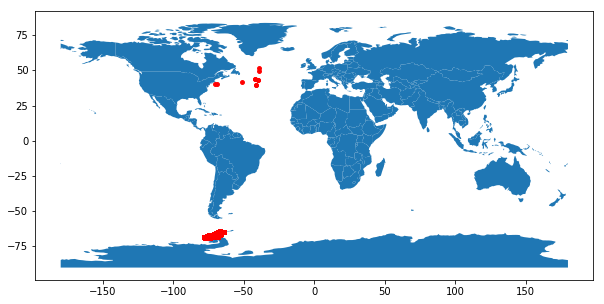

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10, 6), ax=ax)
gdf.sample(n=10000).plot(ax=ax, marker='o', color='red', markersize=15)

(-90, -40)

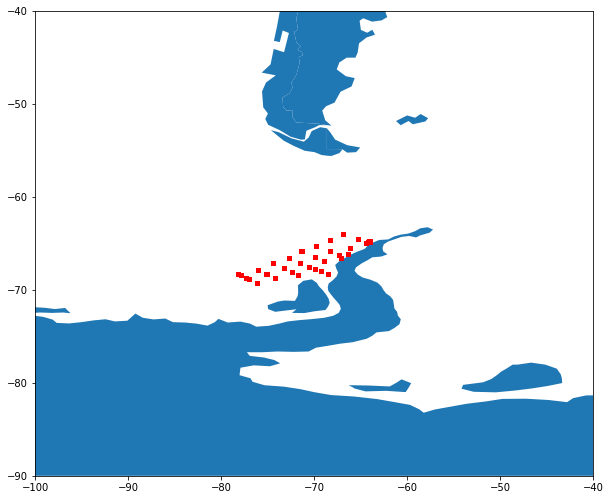

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10, 6), ax=ax)
gdf.sample(n=20000).plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(-100, -40)
ax.set_ylim(-90,-40)

(-70, -63.5)

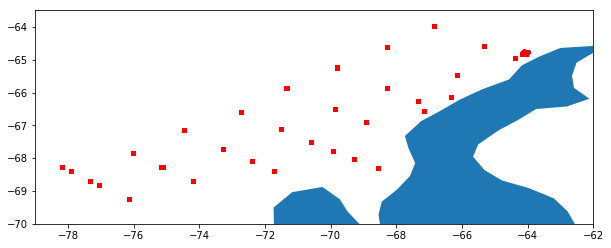

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10, 6), ax=ax)
gdf.sample(n=20000).plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(-79, -62)
ax.set_ylim(-70,-63.5)

In [24]:
img_md_subset.groupby('object_date')['object_id'].nunique()

object_date
20170830       43
20170831      149
20170901      134
20170902      111
20170903       53
20170904       19
20170905       67
20170906        9
20170907       50
20170908       97
20170909       80
20170910       29
20170911      172
20170912       99
20170913      111
20170914       92
20170915       59
20170916       42
20170917       55
20170918      104
20170919       36
20170920       19
20170921       42
20170922      165
20171114      530
20171116    11196
20171117    11297
20171120       38
20171124    29974
20171130    38407
            ...  
20180401        8
20180402      163
20180403       28
20180404       33
20180405       27
20181102    14801
20181103     5236
20181106     8782
20181107    13504
20181115    19507
20181126    34176
20181210    30299
20181223    59128
20181227    55864
20190106    35758
20190107    19345
20190108    17695
20190109    20603
20190110    33319
20190111    92217
20190112    56625
20190113    40636
20190114    41564
20190115    4629

In [25]:
unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()
with pd.option_context('display.max_rows', 200):
    print(unique_validated)

object_annotation_category
Amphiprora                    502
Asteromphalus                   5
Bacillariophyceae             429
Banquisia belgicae             43
Ceratium                      214
Chaetoceros single            159
Chaetoceros<Mediophyceae      729
Ciliophora                    546
Cocconeis                      13
Corethron                     309
Crustacea                       7
Cryptophyta                  1045
Cylindrotheca                 377
Dactyliosolen                 148
Dictyochales                  737
Dinophyceae                   145
Dinophysis                     29
Diplopsalis<Dinophyceae X      12
Eucampia                      102
Eucampia chain                 62
Guinardia                     360
Gymnodinium                   464
Gyrodinium                     85
Katodinium                    477
Licmophora                     78
Membraneis                    260
Membraneis chain                8
Navicula                      350
Nitzschia frigida    

Filter this data to only use validated and other filters TODO

In [26]:
val_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']
len(val_subset)

35840

#### Getting Images Organized

In [27]:
import glob, os

file_dir = '../../../Data/140920_export/'

os.chdir(file_dir)
fn_list = []
for file in glob.glob("*.png"):
    fn_list.append(file)

In [28]:
fn_edit = [x[:-4] for x in fn_list]
fn_edit[0]

'D20171215T192151_IFCB116_08607'

Only use data where we have both labels and imagery

In [29]:
val_img_subset = val_subset[val_subset['object_id'].isin(fn_edit)]
len(val_img_subset)

35840

Only use classes with `min_count` or more samples

In [30]:
min_count = 20


unique_validated = val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >= min_count]

val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(sufficient_classes.index))]

In [31]:
val_img_subset.head()

object_id object_annotation_status  \
0  D20180221T193119_IFCB116_01153                validated   
1  D20180221T202431_IFCB116_00153                validated   
2  D20180221T202431_IFCB116_01303                validated   
3  D20180221T202431_IFCB116_03008                validated   
4  D20180221T212254_IFCB116_07034                validated   

  object_annotation_category  \
0                Pyramimonas   
1                Gymnodinium   
2                Gymnodinium   
3                 Katodinium   
4                Pyramimonas   

                         object_annotation_hierarchy sample_flag  object_lat  \
0  living>Eukaryota>Archaeplastida>Viridiplantae>...        good    -64.7535   
1  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
2  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
3  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
4  living>Eukaryota>Archaeplastida>Viridiplantae>...        good    -64.7802   

   object_lon  object_date  object_time  object_pmt_fluorescence  \
0    -64.1339     20180221       193119                  0.26577   
1    -64.1655     20180221       202431                  0.00269   
2    -64.1655     20180221       202431                  0.17801   
3    -64.1655     20180221       202431                  0.00254   
4    -63.9785     20180221       212254                  0.02183   

   object_peak_fluorescence merged_category  \
0                   1.71370    chlorophytes   
1                   0.01279     gymnodinium   
2                   1.47800     gymnodinium   
3                   0.01276      katodinium   
4                   0.35693    chlorophytes   

                              geometry  
0            POINT (-64.1339 -64.7535)  
1  POINT (-64.16549999999999 -64.7741)  
2  POINT (-64.16549999999999 -64.7741)  
3  POINT (-64.16549999999999 -64.7741)  
4  POINT (-63.9785 -64.78019999999999)

In [32]:
with pd.option_context('display.max_rows', 200):
    print(val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique())

object_annotation_category
Amphiprora                   502
Bacillariophyceae            429
Banquisia belgicae            43
Ceratium                     214
Chaetoceros single           159
Chaetoceros<Mediophyceae     729
Ciliophora                   546
Corethron                    309
Cryptophyta                 1045
Cylindrotheca                377
Dactyliosolen                148
Dictyochales                 737
Dinophyceae                  145
Dinophysis                    29
Eucampia                     102
Eucampia chain                62
Guinardia                    360
Gymnodinium                  464
Gyrodinium                    85
Katodinium                   477
Licmophora                    78
Membraneis                   260
Navicula                     350
Nitzschia frigida            833
Odontella sp.                 37
Phaeocystis                 1091
Proboscia sp.                345
Pseudo-Nitzschia chain       995
Pyramimonas                 1408
Rhizosolenia    

In [33]:
class_id_list = [[x, i] for i, x in enumerate(list(sufficient_classes.index))]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

class_id_dict

{'Amphiprora': 0,
 'Bacillariophyceae': 1,
 'Banquisia belgicae': 2,
 'Ceratium': 3,
 'Chaetoceros single': 4,
 'Chaetoceros<Mediophyceae': 5,
 'Ciliophora': 6,
 'Corethron': 7,
 'Cryptophyta': 8,
 'Cylindrotheca': 9,
 'Dactyliosolen': 10,
 'Dictyochales': 11,
 'Dinophyceae': 12,
 'Dinophysis': 13,
 'Eucampia': 14,
 'Eucampia chain': 15,
 'Guinardia': 16,
 'Gymnodinium': 17,
 'Gyrodinium': 18,
 'Katodinium': 19,
 'Licmophora': 20,
 'Membraneis': 21,
 'Navicula': 22,
 'Nitzschia frigida': 23,
 'Odontella sp.': 24,
 'Phaeocystis': 25,
 'Proboscia sp.': 26,
 'Pseudo-Nitzschia chain': 27,
 'Pyramimonas': 28,
 'Rhizosolenia': 29,
 'Thalassiosira': 30,
 'Tintinnida': 31,
 'Torodinium': 32,
 'Warnowia': 33,
 'badfocus<artefact': 34,
 'bead': 35,
 'bubble': 36,
 'centric': 37,
 'centric 1 temp': 38,
 'centric 2 temp': 39,
 'centric 3 temp': 40,
 'centric 4 temp': 41,
 'centric 6 temp': 42,
 'chain<centric': 43,
 'chain<pennate': 44,
 'detritus': 45,
 'dinoflagellate-i': 46,
 'dinoflagellate-ii

In [34]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

max_count = 500

# TODO need to somehow prioritize the undersampled classes first or they might only consist of the highly available ones
# this might be easier if merge them after this step...
for index, row in val_img_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < max_count:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

22256

In [35]:
balanced_df = val_img_subset[val_img_subset['object_id'].isin(object_ids)]
balanced_df.head()

object_id object_annotation_status  \
0  D20180221T193119_IFCB116_01153                validated   
1  D20180221T202431_IFCB116_00153                validated   
2  D20180221T202431_IFCB116_01303                validated   
3  D20180221T202431_IFCB116_03008                validated   
4  D20180221T212254_IFCB116_07034                validated   

  object_annotation_category  \
0                Pyramimonas   
1                Gymnodinium   
2                Gymnodinium   
3                 Katodinium   
4                Pyramimonas   

                         object_annotation_hierarchy sample_flag  object_lat  \
0  living>Eukaryota>Archaeplastida>Viridiplantae>...        good    -64.7535   
1  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
2  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
3  living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...        good    -64.7741   
4  living>Eukaryota>Archaeplastida>Viridiplantae>...        good    -64.7802   

   object_lon  object_date  object_time  object_pmt_fluorescence  \
0    -64.1339     20180221       193119                  0.26577   
1    -64.1655     20180221       202431                  0.00269   
2    -64.1655     20180221       202431                  0.17801   
3    -64.1655     20180221       202431                  0.00254   
4    -63.9785     20180221       212254                  0.02183   

   object_peak_fluorescence merged_category  \
0                   1.71370    chlorophytes   
1                   0.01279     gymnodinium   
2                   1.47800     gymnodinium   
3                   0.01276      katodinium   
4                   0.35693    chlorophytes   

                              geometry  
0            POINT (-64.1339 -64.7535)  
1  POINT (-64.16549999999999 -64.7741)  
2  POINT (-64.16549999999999 -64.7741)  
3  POINT (-64.16549999999999 -64.7741)  
4  POINT (-63.9785 -64.78019999999999)

In [36]:
len(balanced_df)

22258

## Run the Model

### Preprocess for Keras

Load all data into memory, may not work at full size

In [37]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

images = []
labels = []
merged_labels = []
original_labels = []
flu_data = []

for index, row in balanced_df.sample(frac=1).iterrows():
    
    # TODO need to think about optimal size and that size actually corresponds to class
    # maybe add blackspace instead of interpolating because it is changing the morphology

    #img = image.load_img(row['full_path'], target_size=(150, 150), color_mode="grayscale")
    img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
    images.append(image.img_to_array(img))
    labels.append(class_id_dict[row['object_annotation_category']])
    merged_labels.append(row['merged_category'])
    original_labels.append(row['object_annotation_category'])
    flu_data.append([row['object_pmt_fluorescence'], row['object_peak_fluorescence']]) 
    
images = np.array(images)
labels = np.array(labels)
merged_labels = np.array(merged_labels)
original_labels = np.array(original_labels)
flu_data = np.array(flu_data)

In [ ]:
images.shape

In [ ]:
# view a bunch of the different classes

(10, 150, 150)


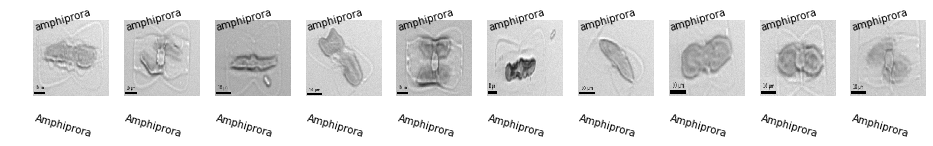

(10, 150, 150)


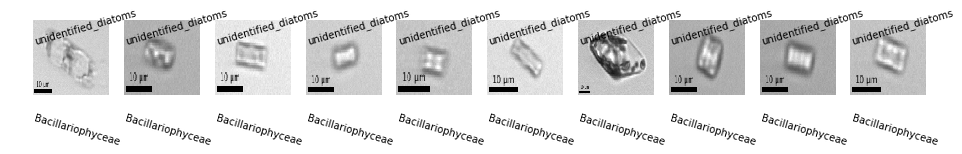

(10, 150, 150)


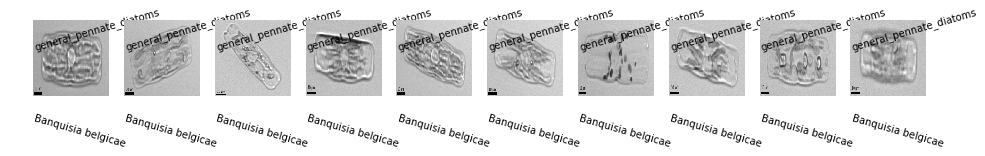

(10, 150, 150)


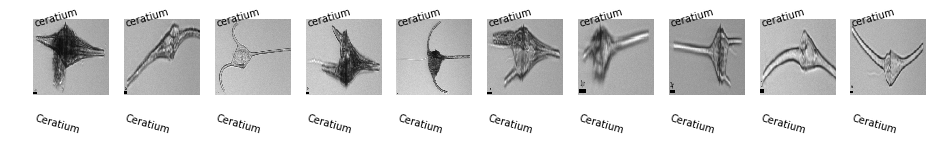

(10, 150, 150)


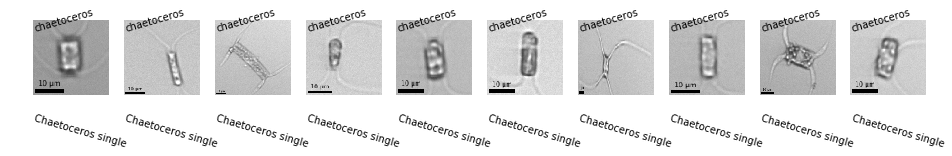

(10, 150, 150)


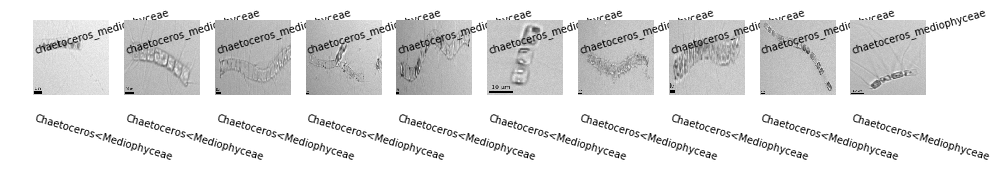

(10, 150, 150)


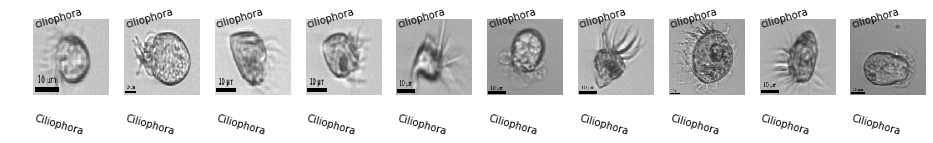

(10, 150, 150)


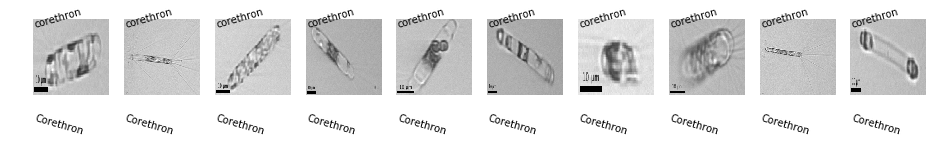

(10, 150, 150)


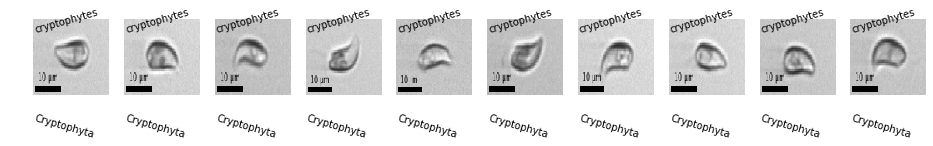

(10, 150, 150)


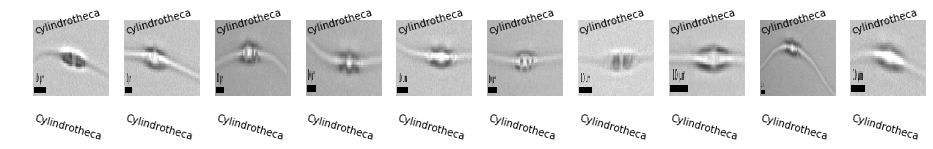

(10, 150, 150)


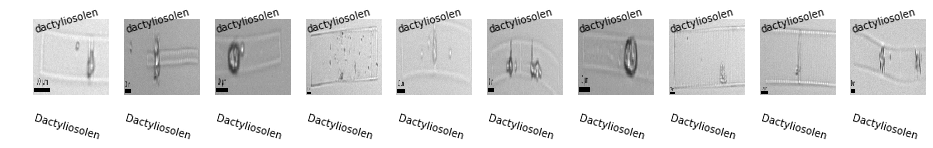

(10, 150, 150)


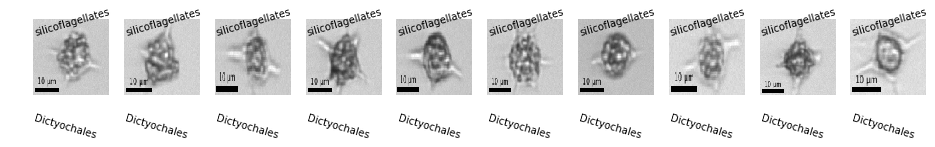

(10, 150, 150)


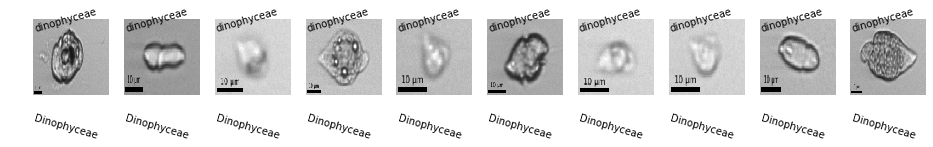

(10, 150, 150)


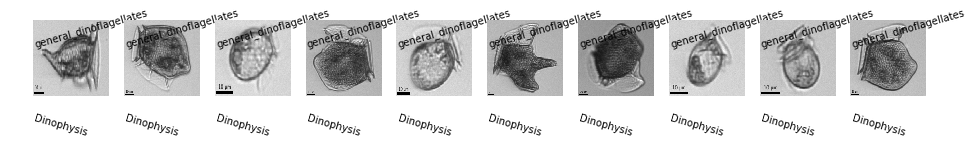

(10, 150, 150)


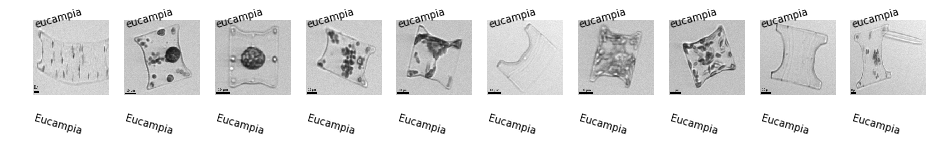

(10, 150, 150)


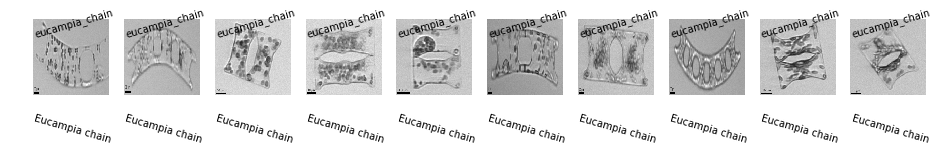

(10, 150, 150)


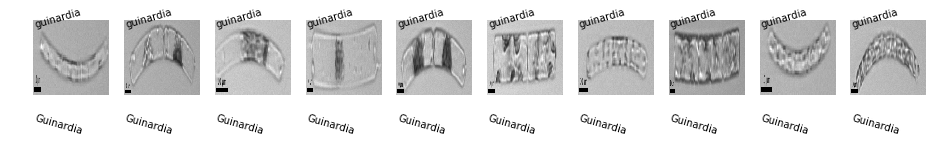

(10, 150, 150)


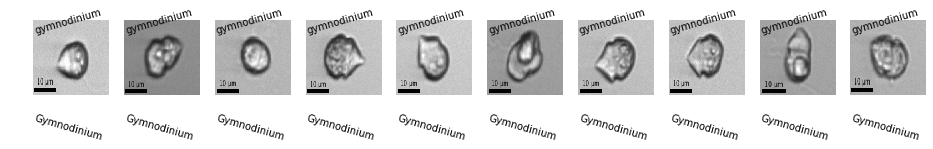

(10, 150, 150)


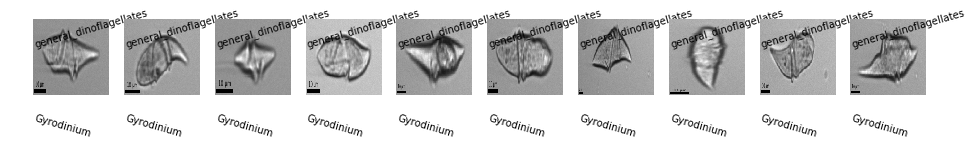

(10, 150, 150)


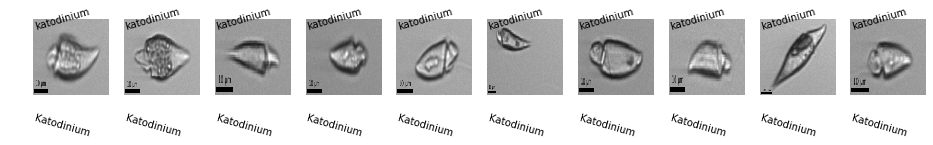

(10, 150, 150)


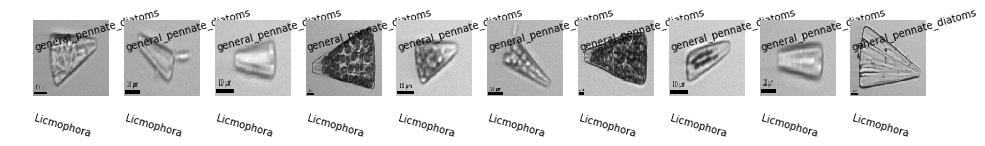

(10, 150, 150)


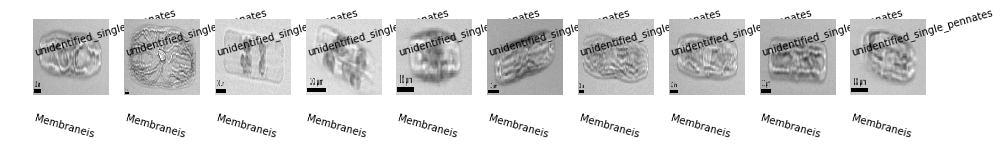

(10, 150, 150)


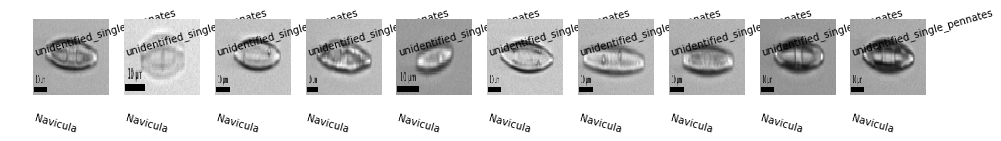

(10, 150, 150)


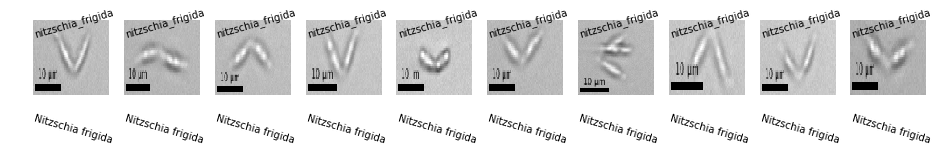

(10, 150, 150)


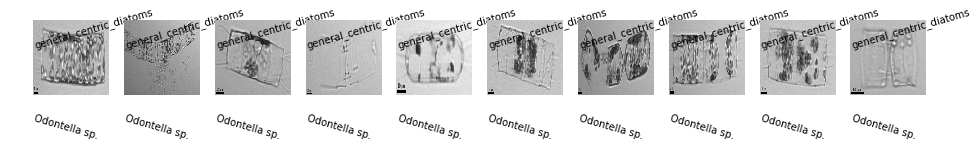

(10, 150, 150)


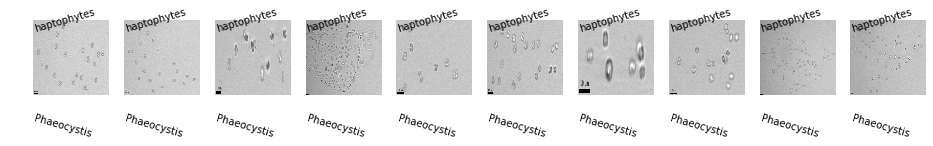

(10, 150, 150)


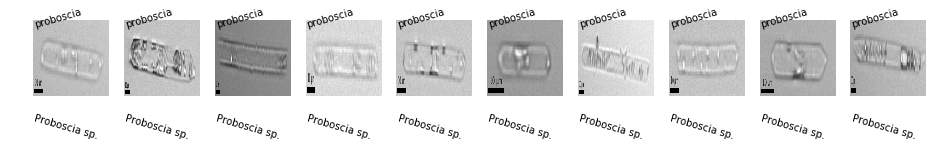

(10, 150, 150)


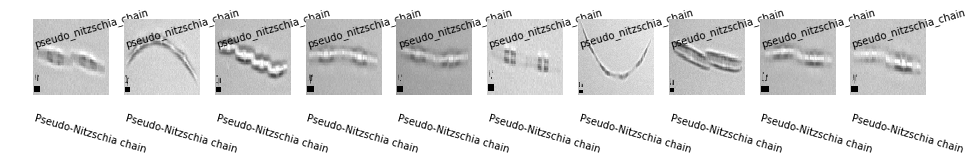

(10, 150, 150)


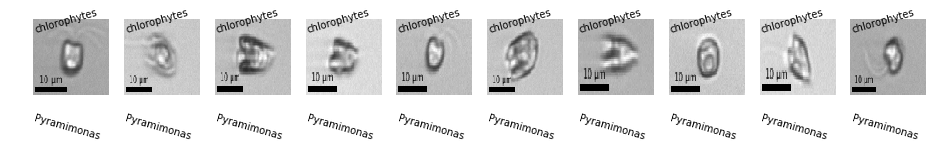

(10, 150, 150)


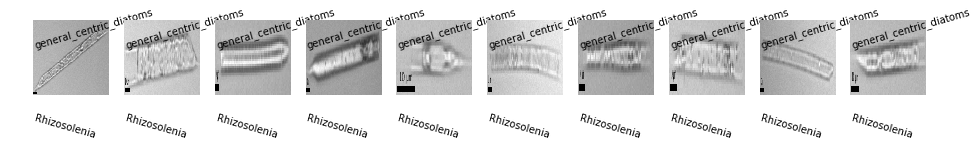

(10, 150, 150)


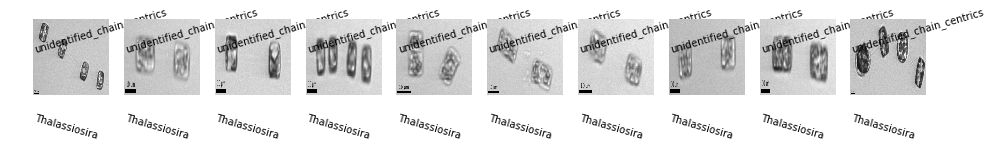

(10, 150, 150)


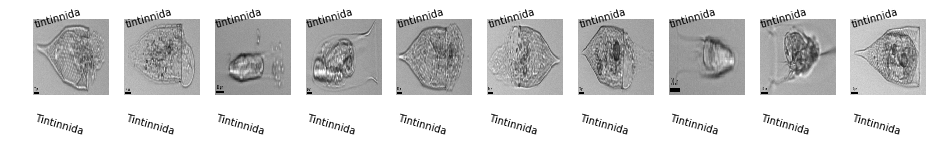

(10, 150, 150)


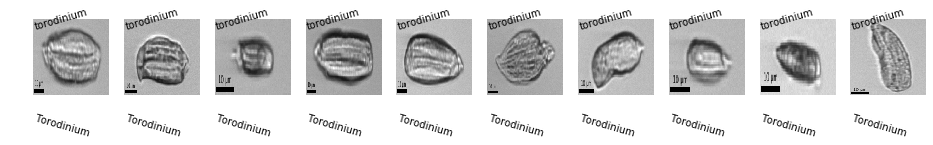

(10, 150, 150)


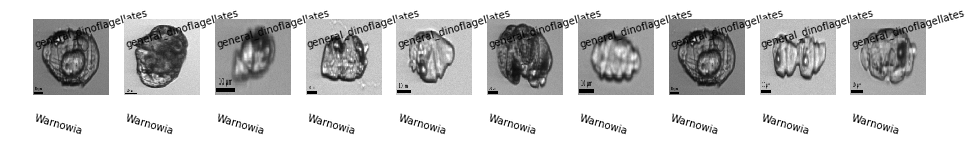

(10, 150, 150)


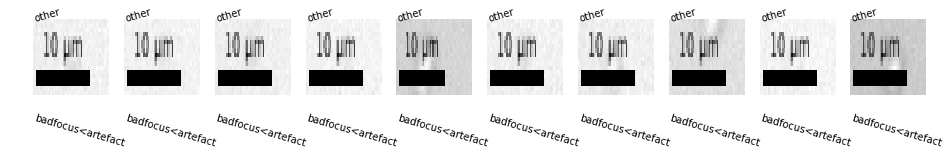

(10, 150, 150)


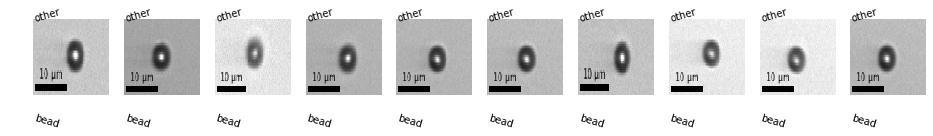

(10, 150, 150)


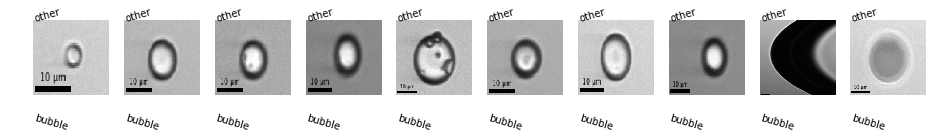

(10, 150, 150)


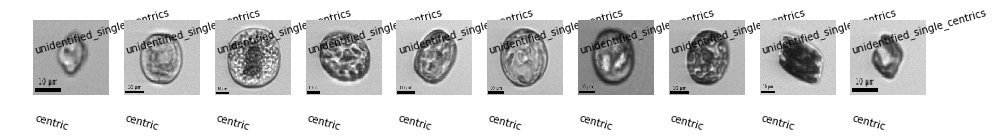

(10, 150, 150)


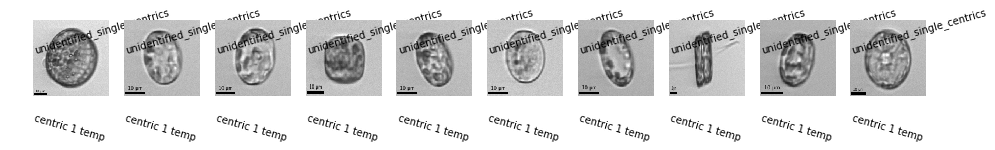

(10, 150, 150)


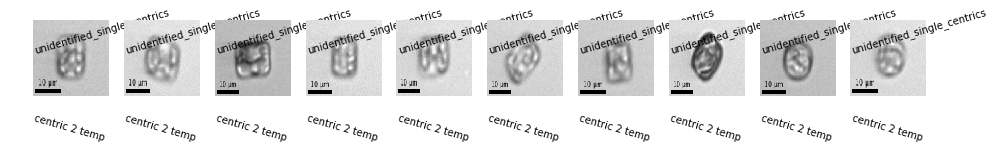

(10, 150, 150)


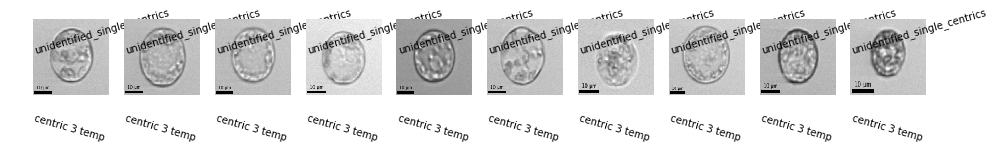

(10, 150, 150)


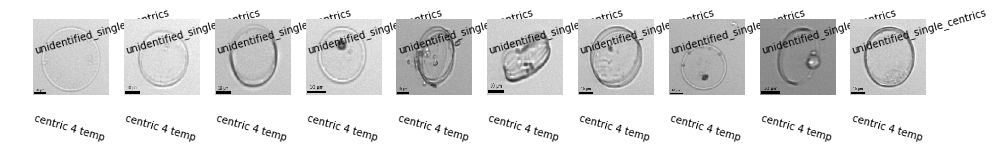

(10, 150, 150)


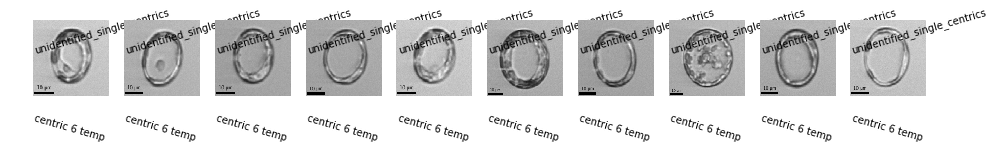

(10, 150, 150)


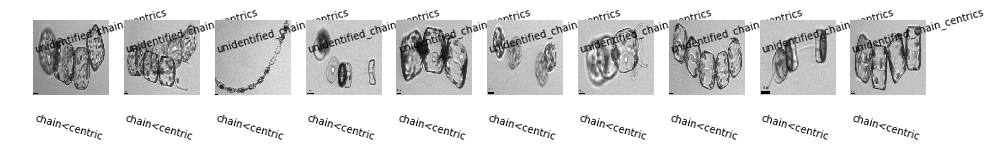

(10, 150, 150)


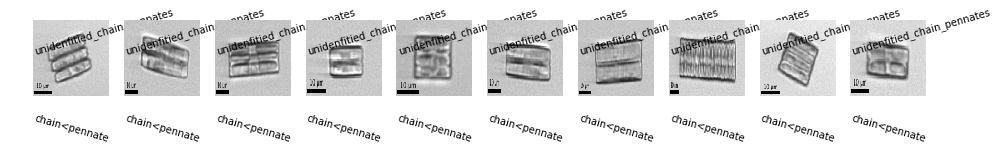

(10, 150, 150)


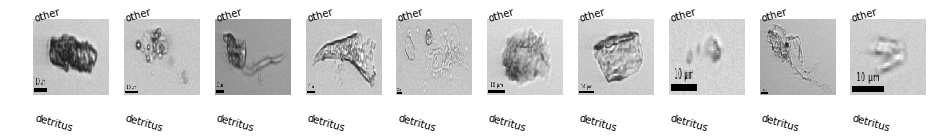

(10, 150, 150)


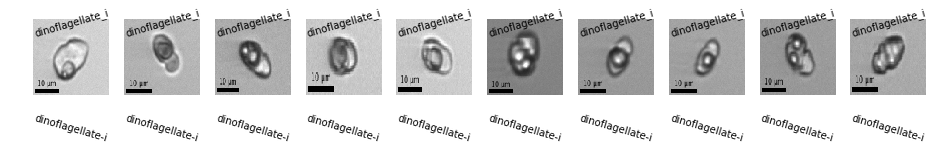

(10, 150, 150)


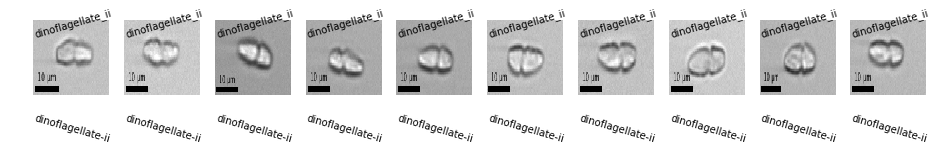

(10, 150, 150)


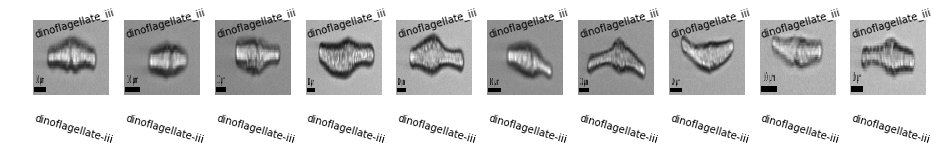

(10, 150, 150)


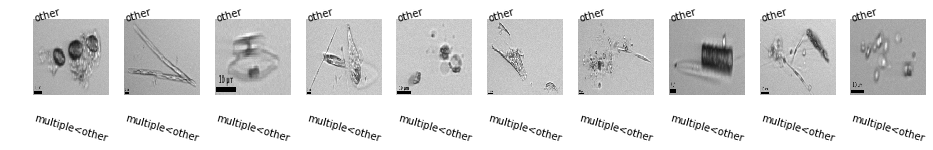

(10, 150, 150)


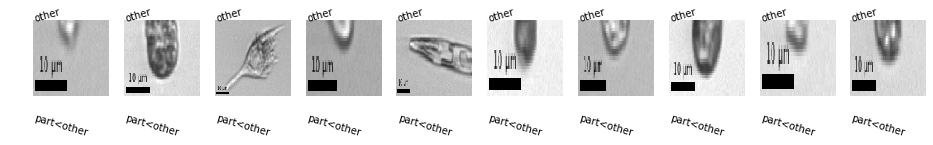

(10, 150, 150)


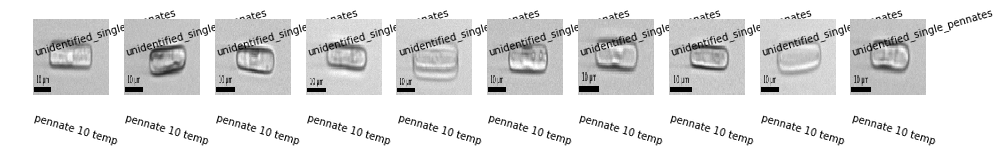

(10, 150, 150)


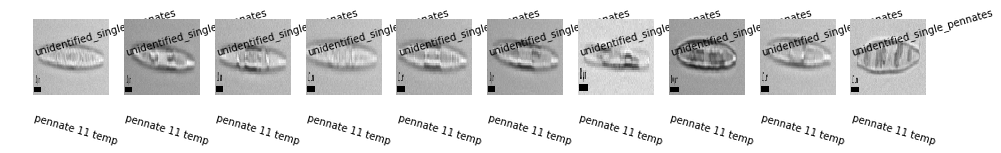

(10, 150, 150)


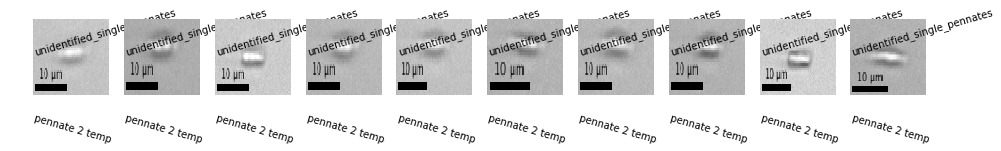

(10, 150, 150)


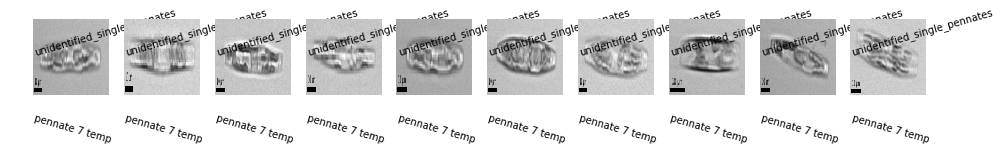

(10, 150, 150)


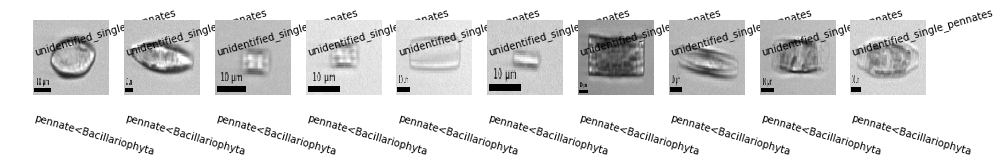

(10, 150, 150)


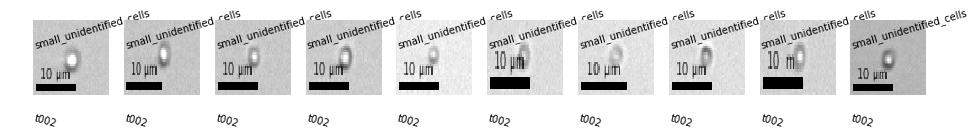

(10, 150, 150)


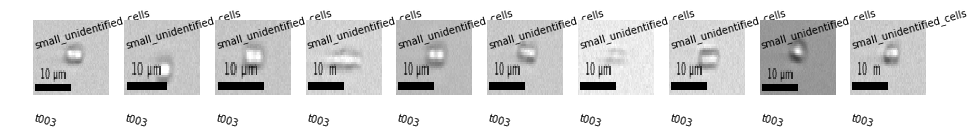

(10, 150, 150)


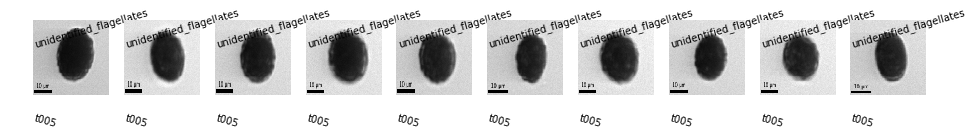

(10, 150, 150)


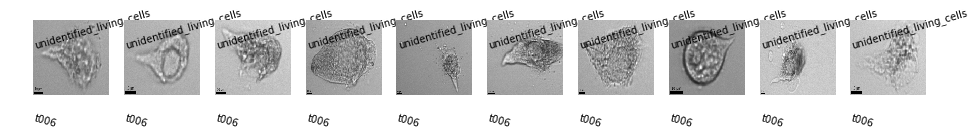

(10, 150, 150)


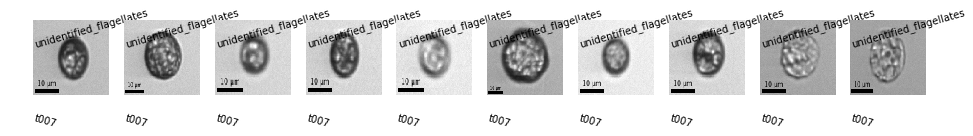

(10, 150, 150)


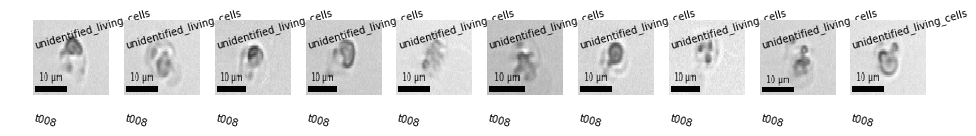

(10, 150, 150)


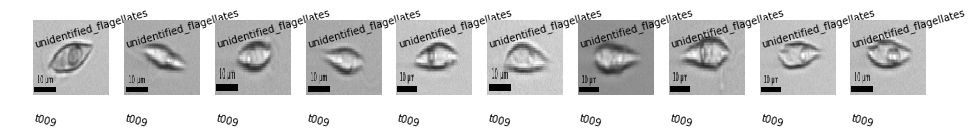

(10, 150, 150)


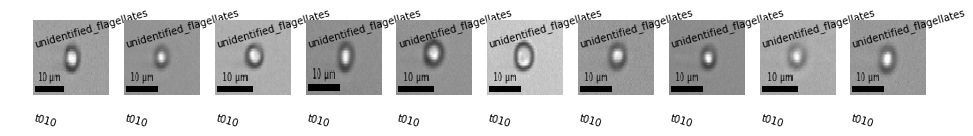

(10, 150, 150)


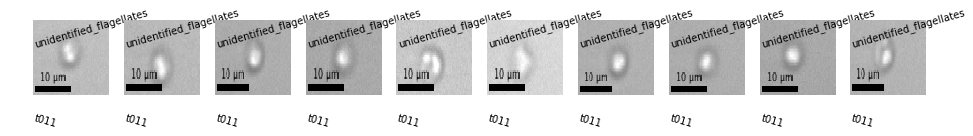

(10, 150, 150)


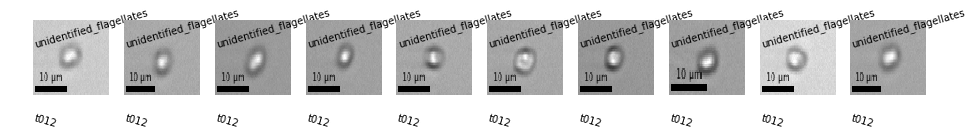

(10, 150, 150)


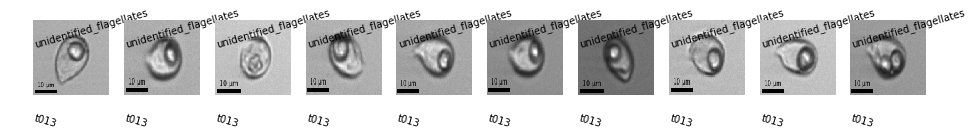

(10, 150, 150)


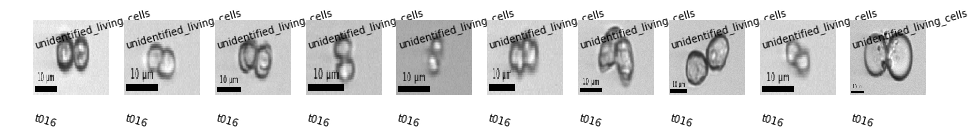

(10, 150, 150)


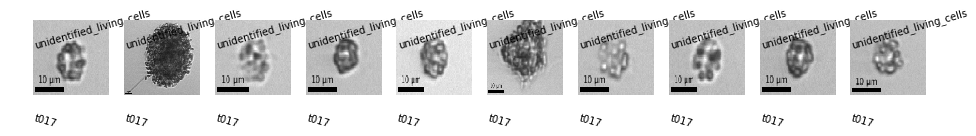

(10, 150, 150)


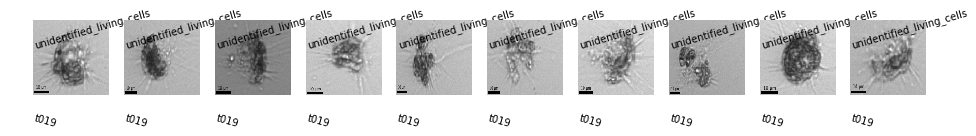

In [41]:
for i in range(np.max(labels)):
    imgs_display = images[labels == i][:10,:,:,0]
    print(imgs_display.shape)
    mlabs = merged_labels[labels == i][:10]
    olabs = original_labels[labels == i][:10]
    fig, ax = plt.subplots(1, 10, figsize=(16, 3))
    for j in range(0, 10):
        try:
            ax[j].imshow(imgs_display[j], cmap = 'gray')
            ax[j].axis('off')
            ax[j].text(0,-10, mlabs[j], rotation=16)
            ax[j].text(0,200, olabs[j],rotation=-16)
        except IndexError:
            continue
    plt.show()

Make a keras style generator to hand this data to the model

In [42]:
# def generate_data(directory, batch_size):
#     """Replaces Keras' native ImageDataGenerator."""
#     i = 0
#     file_list = os.listdir(directory)
#     while True:
#         image_batch = []
#         for b in range(batch_size):
#             if i == len(file_list):
#                 i = 0
#                 random.shuffle(file_list)
#             sample = file_list[i]
#             i += 1
#             image = cv2.resize(cv2.imread(sample[0]), INPUT_SHAPE)
#             image_batch.append((image.astype(float) - 128) / 128)

#         yield np.array(image_batch)

In [ ]:
images[0].shape

In [ ]:
images.shape, labels.shape, flu_data.shape

In [ ]:
from tensorflow import keras

from sklearn.model_selection import train_test_split

num_classes = len(class_id_dict)

test_size = 0.20

X_train, X_test, flu_train, flu_test, y_train, y_test = train_test_split(images, flu_data, labels, test_size=test_size, random_state=42, stratify=labels)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train.shape, flu_train.shape, X_test.shape

### Need to oversample the X_train classes where y_train label is below 500 up to 500 with slight augmentation.

In [ ]:
np.unique(np.argmax(y_train, axis=1), return_counts=True)

In [ ]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Flipud(0.5),
    #iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.1,
        iaa.GaussianBlur(sigma=(0, 0.2))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.9, 1.1)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    #iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    #iaa.Affine(
    #    scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
    #    translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
    #    rotate=(-25, 25),
    #    shear=(-8, 8)
    #)
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i])


In [ ]:
images_aug = seq(images=X_train[:20])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

In [ ]:
images_aug = seq(images=X_train[1000:1020])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

In [ ]:
y_train_argmax = np.argmax(y_train, axis=1)

for i in range(70):
    fig, ax = plt.subplots(figsize=(12,8))

    ax.hist(flu_train[y_train_argmax == i,0], bins=50, range=(0,2))
    fig.show()

In [ ]:
y_train_argmax = np.argmax(y_train, axis=1)

for i in range(70):
    fig, ax = plt.subplots(figsize=(12,8))

    ax.hist(flu_train[y_train_argmax == i,1], bins=50, range=(0,2))
    fig.show()

In [ ]:
import random

y_train_argmax = np.argmax(y_train, axis=1)

#train_count = int((1-test_size) * max_count)
train_count = max_count

# take the image and augment it and add it to a stack and add the label to another stack and the concat them to the main stacks
class_labels, count_of_classes = np.unique(y_train_argmax, return_counts=True)
list_of_all_images = []
list_of_all_flu_data = []
list_of_all_labs = []
for l, c in enumerate(count_of_classes):
    #print(l)
    list_of_class_images = []
    list_of_class_labs = []
    list_of_class_flu_data = []
    if c < train_count:
        num_to_aug = train_count - c
        all_im_of_class = X_train[y_train_argmax == l]
        all_flu_of_class = flu_train[y_train_argmax == l]
        for i in range(0,num_to_aug):
            im_idx = random.randint(0, all_im_of_class.shape[0]-1)
            im = all_im_of_class[im_idx,:,:,:]
            flu = all_flu_of_class[im_idx,:]
            im = seq(image=im)
            flu = flu*random.uniform(0.9, 1.1)
            list_of_class_images.append(im)
            list_of_class_labs.append(l)
            list_of_class_flu_data.append(flu)
    list_of_all_images = list_of_all_images + list_of_class_images
    list_of_all_labs = list_of_all_labs + list_of_class_labs
    list_of_all_flu_data = list_of_all_flu_data + list_of_class_flu_data

In [ ]:
list_of_all_labs = np.array(list_of_all_labs)
one_hot = np.zeros((list_of_all_labs.size, list_of_all_labs.max()+1))
one_hot[np.arange(list_of_all_labs.size),list_of_all_labs] = 1
y_train.shape, one_hot.shape

In [ ]:
# add these new images into the training data
X_train = np.concatenate((X_train, np.array(list_of_all_images)), axis=0)
y_train = np.concatenate((y_train, one_hot))

In [ ]:
list_of_all_flu_data = np.array(list_of_all_flu_data)
flu_train = np.concatenate((flu_train, list_of_all_flu_data), axis=0)

In [ ]:
X_train.shape, flu_train.shape, y_train.shape

### Must normalize the data or training results are erratic!

In [ ]:
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

In [ ]:
np.mean(flu_train[:,0]), np.std(flu_train[:,0])

In [ ]:
np.mean(flu_train[:,1]), np.std(flu_train[:,1])

In [ ]:
X_train = X_train / 130
X_test = X_test / 130
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

In [ ]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

#### shuffle input data

In [ ]:
from sklearn.utils import shuffle
X_train, flu_train, y_train = shuffle(X_train, flu_train, y_train)

In [ ]:
input_shape = X_train.shape[1:]
flu_input_shape = flu_train.shape[1:]
batch_size = 40

epochs = 50

input_shape, flu_input_shape

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

### Medium Complexity Model

In [ ]:
inputs = Input(shape=input_shape)
input_flu = Input(shape=flu_input_shape)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# switch to functional and concat the other features here before the dense layer

x = Flatten()(x)
x = Concatenate(axis=-1)([x, input_flu])
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model([inputs,input_flu], output)

model.summary()

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# switch to functional and concat the other features here before the dense layer

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
activation_10 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
activation_11 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 74, 74, 64)        18496     
__________

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.10,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.10,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
    
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

datagen_flu = ImageDataGenerator()
    
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)
datagen_flu.fit(flu_train)

def generator_two_inputs(X_train, flu_train, y_train, batch_size):
    genX1 = datagen.flow(X_train, y_train,  batch_size=batch_size)
    genX2 = datagen_flu.flow(flu_train, y, batch_size=batch_size)
    while True:
        X1i = genX1.next()
        X2i = genX2.next()
        yield [X1i[0], X2i[0]], X1i[1]

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

checkpoint = ModelCheckpoint('../model_weights_all_classes.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# Fit the model on the batches generated by datagen.flow().
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])

history = model.fit_generator(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        epochs=epochs,
        verbose=1,
        validation_data=(X_test, y_test),
        callbacks=callbacks_list)

NameError: name 'datagen' is not defined

In [ ]:
checkpoint = ModelCheckpoint('../model_weights_all_classes_flu.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# Fit the model on the batches generated by datagen.flow().
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])

history = model.fit(x=[X_train, flu_train], y=y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([X_test,flu_test], y_test),
                    callbacks=callbacks_list)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.10,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.10,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
    
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

checkpoint = ModelCheckpoint('../model_weights_all_classes.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# Fit the model on the batches generated by datagen.flow().
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])

history = model.fit_generator(
        #datagen.flow(X_train, y_train, batch_size=batch_size),
        generator_two_inputs(X_train, flu_train, y_train, batch_size),
        epochs=epochs,
        verbose=1,
        validation_data=([X_test, flu_test], y_test),
        callbacks=callbacks_list)

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_acc")
plt.savefig("modelacc.png", dpi=300)
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_loss")
plt.savefig("../modelloss.png", dpi=300)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [ ]:
predictions = np.argmax(model.predict([X_test, flu_test]), axis=1)
labs = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

Y_val_pred = predictions
Y_val_real = labs
cm = confusion_matrix(Y_val_real, Y_val_pred)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(15,15)) 

plt.imshow(cm, cmap = 'Greens')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, list(class_id_dict), rotation=90)
plt.yticks(tick_marks, list(class_id_dict))

fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

#plt.savefig("full_model_conf_matrix.png", dpi=300)
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [ ]:
# TODO gauge model confidence by the predicted class

In [ ]:
from tensorflow import keras

model = keras.models.load_model('../model_weights_all_classes_flu.hdf5')

In [ ]:
val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

In [ ]:
# go through each initial class and find out accuracy of how often that is in the correct merged class

In [ ]:
class_id_dict

#### these are all slight overestimates because they're not being run on only test data

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

names = []
accs = []
counts = []
all_labs = []
all_preds = []

for name, group in val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id']:
    print('*** ',name)    
    images = []
    labels = []
    flus = []

    for fn in group:

        # TODO need to think about optimal size and that size actually corresponds to class
        # maybe add blackspace instead of interpolating because it is changing the morphology

        img = image.load_img(fn+'.png', target_size=(150, 150), color_mode="grayscale")
        images.append(image.img_to_array(img))
        mc = val_img_subset[val_img_subset.object_id == fn].object_annotation_category
        pmt = val_img_subset[val_img_subset.object_id == fn].object_pmt_fluorescence
        peak = val_img_subset[val_img_subset.object_id == fn].object_peak_fluorescence
        labels.append(class_id_dict[mc.values[0]])
        flus.append([pmt.values[0], peak.values[0]]) 
        
    images = np.array(images)
    labels = np.array(labels)
    flus = np.array(flus)

    X_predict = images / 130
    print('normed mean and std: ', np.mean(X_predict), np.std(X_predict))
    
    predictions = np.argmax(model.predict([X_predict, flus]), axis=1)
    print(np.count_nonzero(labels==predictions), len(labels))
    print('accuracy:', np.count_nonzero(labels==predictions)/len(labels))
    names.append(name)
    accs.append(np.count_nonzero(labels==predictions)/len(labels))
    counts.append(len(labels))
    all_labs += list(labels)
    all_preds += list(predictions)
    print('------')
    
    


In [ ]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(accs, names)
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('individual_class_acc.png', dpi=300)
plt.show()

In [ ]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(accs, counts)
#ax.set_yticks(range(0,len(names)))
#ax.set_yticklabels(nc)
#ax.set_xlim(-10,500)
#ax.set_xscale('log')
ax.set_ylim(-10,1500)

# Don't allow the axis to be on top of your data
#ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('count_vs_acc.png', dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(all_labs), np.array(all_preds))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(15,15)) 

plt.imshow(cm, cmap = 'Greens')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, list(class_id_dict), rotation=90)
plt.yticks(tick_marks, list(class_id_dict))

fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

#plt.savefig('conf_matrix_unmerged.png', dpi=300)

In [114]:
# 

In [79]:
merged_labs_truth = []
for lab in all_labs:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs_truth.append(class_names[i])

In [80]:
merged_labs = []
for lab in all_preds:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs.append(class_names[i])


In [81]:
class_id_dict

{'Amphiprora': 0,
 'Bacillariophyceae': 1,
 'Banquisia belgicae': 2,
 'Ceratium': 3,
 'Chaetoceros single': 4,
 'Chaetoceros<Mediophyceae': 5,
 'Ciliophora': 6,
 'Corethron': 7,
 'Cryptophyta': 8,
 'Cylindrotheca': 9,
 'Dactyliosolen': 10,
 'Dictyochales': 11,
 'Dinophyceae': 12,
 'Dinophysis': 13,
 'Eucampia': 14,
 'Eucampia chain': 15,
 'Guinardia': 16,
 'Gymnodinium': 17,
 'Gyrodinium': 18,
 'Katodinium': 19,
 'Licmophora': 20,
 'Membraneis': 21,
 'Navicula': 22,
 'Nitzschia frigida': 23,
 'Odontella sp.': 24,
 'Phaeocystis': 25,
 'Proboscia sp.': 26,
 'Pseudo-Nitzschia chain': 27,
 'Pyramimonas': 28,
 'Rhizosolenia': 29,
 'Thalassiosira': 30,
 'Tintinnida': 31,
 'Torodinium': 32,
 'Warnowia': 33,
 'badfocus<artefact': 34,
 'bead': 35,
 'bubble': 36,
 'centric': 37,
 'centric 1 temp': 38,
 'centric 2 temp': 39,
 'centric 3 temp': 40,
 'centric 4 temp': 41,
 'centric 6 temp': 42,
 'chain<centric': 43,
 'chain<pennate': 44,
 'detritus': 45,
 'dinoflagellate-i': 46,
 'dinoflagellate-ii

In [82]:
class_id_dict = {'amphiprora': 0,
 'chaetoceros': 1,
 'chaetoceros_mediophyceae': 2,
 'chlorophytes': 3,
 'ciliophora': 4,
 'corethron': 5,
 'cryptophytes': 6,
 'cylindrotheca': 7,
 'dactyliosolen': 8,
 'dinoflagellate_i': 9,
 'dinoflagellate_ii': 10,
 'dinoflagellate_iii': 11,
 'dinophyceae': 12,
 'eucampia': 13,
 'eucampia_chain': 14,
 'general_centric_diatoms': 15,
 'general_dinoflagellates': 16,
 'general_pennate_diatoms': 17,
 'gymnodinium': 18,
 'haptophytes': 19,
 'katodinium': 20,
 'nitzschia_frigida': 21,
 'other': 22,
 'proboscia': 23,
 'pseudo_nitzschia_chain': 24,
 'silicoflagellates': 25,
 'small_unidentified_cells': 26,
 'tintinnida': 27,
 'unidenfitied_chain_pennates': 28,
 'unidentified_chain_centrics': 29,
 'unidentified_diatoms': 30,
 'unidentified_flagellates': 31,
 'unidentified_living_cells': 32,
 'unidentified_single_centrics': 33,
 'unidentified_single_pennates': 34,
 'torodinium':35,
 'guinardia': 36,
 'ceratium' : 37}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

In [83]:
merged_labs_id = [class_id_dict[x] for x in merged_labs]
len(merged_labs), len(merged_labs_id)

(35773, 35773)

In [84]:
merged_truth_id = [class_id_dict[x] for x in merged_labs_truth]
len(merged_labs_truth), len(merged_truth_id)

(35773, 35773)

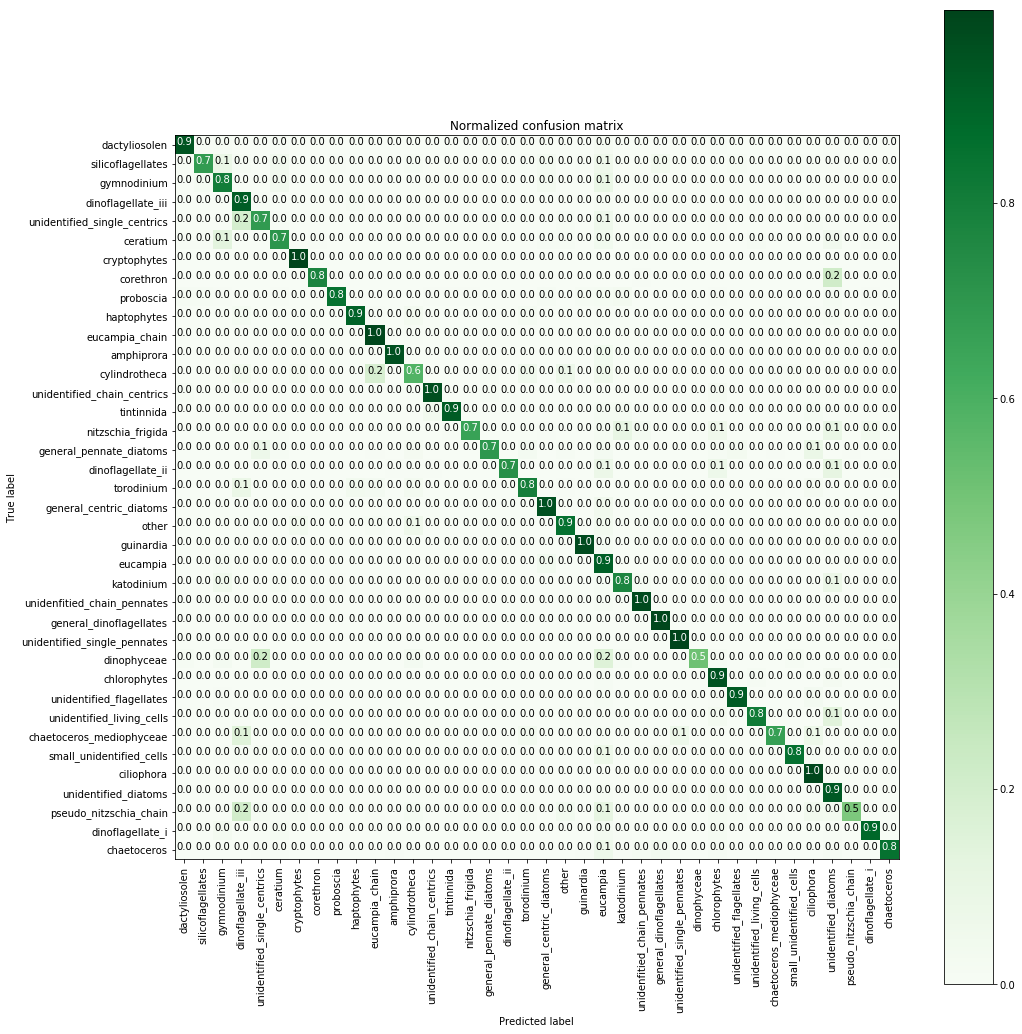

In [85]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(merged_labs_id), np.array(merged_truth_id))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(15,15)) 

plt.imshow(cm, cmap = 'Greens')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, list(class_id_dict), rotation=90)
plt.yticks(tick_marks, list(class_id_dict))

fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

plt.savefig('conf_matrix_merged.png', dpi=300)